In [1]:
import sys, os
# from scipy.stats import norm

In [2]:
sys.path.append(os.path.abspath(os.path.join('../utils')))
from ordinal_model.OrdinalRegression import OrdinalRegression
import autograd.numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import confusion_matrix
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
from autograd import grad, value_and_grad

# Toy Data

In [4]:
state_2_df = pd.read_csv('../toydata/simulated_data/features_from_state2.csv')
state_2_df

,temperature_1,temperature_2,ordinal_label
0,12.565857,0.109851,2
1,13.218399,0.167699,2
2,13.363536,-0.496569,1
3,12.975686,-0.305597,1
4,11.949287,-1.845899,0
...,...,...,...
94,12.652284,0.703700,2
95,13.164679,-0.973421,1
96,12.223797,0.409554,2
97,13.915844,1.234273,2


![alternative text](../toydata/simulated_data/features_from_state_2.png)

In [5]:
scaler = MinMaxScaler()
X = scaler.fit_transform(state_2_df[['temperature_1', 'temperature_2']].values)
# X = state_2_df[['temperature_1', 'temperature_2']].values
y = state_2_df['ordinal_label'].values
print(f'X: {X.shape}')
print(X)
print(f'y: {y.shape}')
print(y)

X: (99, 2)
[[0.34881215 0.55541583]
 [0.59610553 0.56971263]
 [0.65110809 0.40554345]
 [0.50412477 0.45274072]
 [0.11515082 0.07206582]
 [0.6112873  0.44652407]
 [0.96125276 0.52034405]
 [0.6887788  0.79942151]
 [0.59883038 0.34867307]
 [0.         0.74257745]
 [0.738802   0.51755134]
 [0.81027906 0.56283017]
 [0.44991055 0.28895268]
 [0.36781423 0.        ]
 [0.53119963 0.53932356]
 [0.74483891 0.79049492]
 [0.67447105 0.807817  ]
 [0.60529951 0.73029134]
 [0.57784959 0.73557156]
 [0.4403603  0.42949464]
 [0.31761671 0.70309347]
 [0.2784953  0.78627806]
 [0.3007077  0.38043927]
 [0.2158231  0.41740294]
 [0.51396616 0.39485602]
 [0.35963003 0.53475116]
 [0.69867301 0.87558782]
 [0.48060351 0.26649242]
 [0.55269547 0.43109202]
 [0.4080644  0.03979886]
 [0.49370298 0.72859512]
 [0.33445174 0.40815835]
 [0.56307376 0.26286485]
 [0.86998039 0.68568611]
 [0.83473832 0.6917939 ]
 [0.49121084 0.6144919 ]
 [0.47700583 1.        ]
 [0.10237318 0.77205017]
 [0.64652471 0.61174011]
 [0.51734508 0

# Ordinal Regression

In [6]:
clf = OrdinalRegression()
clf.fit(X, y)
proba = clf.predict_proba(X)
y_predict = clf.predict(X)
print(proba)
print(y_predict)

[[0.00000000e+000 2.01773224e-165 1.00000000e+000 0.00000000e+000]
 [0.00000000e+000 0.00000000e+000 1.00000000e+000 0.00000000e+000]
 [0.00000000e+000 1.00000000e+000 0.00000000e+000 0.00000000e+000]
 [0.00000000e+000 1.00000000e+000 0.00000000e+000 0.00000000e+000]
 [1.00000000e+000 0.00000000e+000 0.00000000e+000 0.00000000e+000]
 [0.00000000e+000 1.00000000e+000 0.00000000e+000 0.00000000e+000]
 [0.00000000e+000 9.99955957e-001 4.40425456e-005 0.00000000e+000]
 [0.00000000e+000 0.00000000e+000 1.00000000e+000 0.00000000e+000]
 [0.00000000e+000 1.00000000e+000 0.00000000e+000 0.00000000e+000]
 [0.00000000e+000 0.00000000e+000 1.00000000e+000 0.00000000e+000]
 [0.00000000e+000 1.00000000e+000 0.00000000e+000 0.00000000e+000]
 [0.00000000e+000 0.00000000e+000 1.00000000e+000 0.00000000e+000]
 [0.00000000e+000 1.00000000e+000 0.00000000e+000 0.00000000e+000]
 [1.00000000e+000 0.00000000e+000 0.00000000e+000 0.00000000e+000]
 [0.00000000e+000 1.86767175e-031 1.00000000e+000 0.00000000e+

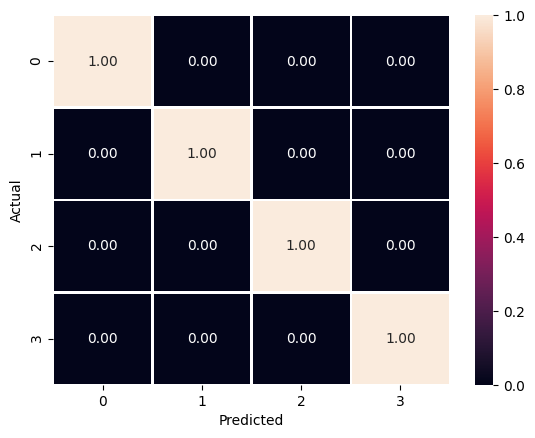

In [7]:
cf_matrix = confusion_matrix(y, y_predict, normalize='true',labels=list(range(y.max()+1))) 

ax = sns.heatmap(cf_matrix, linewidths=1, annot=True, fmt='.2f')
ax.set_ylabel(f'Actual')
ax.set_xlabel(f'Predicted')
plt.show()

# Testing

In [ ]:
X = np.array(
    [
        [-80,-90,-100],
        [4,5,6],
        [80,90,100],
        [-81,-93,-99],
        [4.2,5.1,6.3],
        [81,93,99],
        [-87,-94,-98],
        [4.1,5.2,6.5],
        [87,94,98],
    ]
)
y = np.array(
    [
        0,
        1,
        2,
        0,
        1,
        2,
        0,
        1,
        2,
    ]
)
w_inits = []
for i in range(100):
    w_inits.append(np.random.rand(3) * np.random.randint(0,10))

In [ ]:
clf = OrdinalRegression(padding=50)
clf.set_params(R = 3, N = 3, cut_points  = np.array([-np.inf, -3, 3, np.inf]))

In [ ]:
# for w in w_inits:
#     print(clf.log_likelihood(w, X, y))

In [ ]:
clf.fit(X, y)

In [ ]:
best_w = clf.w

In [ ]:
clf.predict(X)

In [ ]:
clf.log_likelihood(w_inits[99], X, y)